In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as bpdf
import pathlib
import sys
sys.path.append(str(pathlib.Path.cwd().parent.parent))

In [2]:
home_folder = pathlib.Path.cwd().parent.parent
path = home_folder.joinpath(home_folder, 'CSV_results')
df_info = pd.read_csv(path.joinpath('dataset_info.csv'))
df = pd.read_csv(path.joinpath('Cross_validation', 'cross_validation.csv'), index_col=0)

In [3]:
def get_best(df, dataset, metric) :
    "get best performance per oversampler for a specific dataset"
    
    temp_df = df[df['dataset'] == dataset]
    
    return df.loc[temp_df.groupby('oversampler')[metric].idxmax()].sort_values(metric, ascending=False)

def select_best(df, metric) :
    "get best performance per oversampler for all datasets"
    
    temp = []
    
    for dataset in df['dataset'].unique() :
        temp.append(get_best(df, dataset, metric))
        
    res = pd.concat(temp)
    
    return res

def ranking_oversampler(df, metric, return_all = False) :
    
    df2 = df.groupby('oversampler').mean().sort_values(metric, ascending=False)
    df3 = df2[['proportion', metric, f'{metric}_std']]
    
    if return_all :
        return df2
    else :
        return df3
    
def final_ranking(df, metric) :
    
    df2 = select_best(df, metric)
    
    return ranking_oversampler(df2,metric)

In [21]:
df_info.iloc[:,1:7] = df_info.iloc[:,1:7].astype(int)
df_info.iloc[:,-1] = df_info.iloc[:,-1].round(3)

In [22]:
df_info

,dataset,size,features,numerical_features,categorical_features,majority,minority,type,imbalance_ratio
0,ecoli,336,7,5,2,301,35,mixed,0.116
1,optical_digits,5620,64,0,64,5066,554,categorical,0.109
2,satimage,6435,36,36,0,5809,626,numerical,0.108
3,pen_digits,10992,16,16,0,9937,1055,numerical,0.106
4,abalone,4177,10,7,3,3786,391,mixed,0.103
5,sick_euthyroid,3163,42,6,36,2870,293,mixed,0.102
6,spectrometer,531,93,93,0,486,45,numerical,0.093
7,car_eval_34,1728,21,0,21,1594,134,categorical,0.084
8,isolet,7797,617,610,7,7197,600,mixed,0.083
9,us_crime,1994,100,99,1,1844,150,mixed,0.081


In [23]:
print(df_info.to_latex(index=False))

\begin{tabular}{lrrrrrrlr}
\toprule
        dataset &    size &  features &  numerical\_features &  categorical\_features &  majority &  minority &         type &  imbalance\_ratio \\
\midrule
          ecoli &     336 &         7 &                   5 &                     2 &       301 &        35 &        mixed &            0.116 \\
 optical\_digits &    5620 &        64 &                   0 &                    64 &      5066 &       554 &  categorical &            0.109 \\
       satimage &    6435 &        36 &                  36 &                     0 &      5809 &       626 &    numerical &            0.108 \\
     pen\_digits &   10992 &        16 &                  16 &                     0 &      9937 &      1055 &    numerical &            0.106 \\
        abalone &    4177 &        10 &                   7 &                     3 &      3786 &       391 &        mixed &            0.103 \\
 sick\_euthyroid &    3163 &        42 &                   6 &                  

In [42]:
df_info[df_info.type == 'mixed']

,dataset,size,features,numerical_features,categorical_features,majority,minority,type,imbalance_ratio
0,ecoli,336.0,7.0,5.0,2.0,301.0,35.0,mixed,0.116279
4,abalone,4177.0,10.0,7.0,3.0,3786.0,391.0,mixed,0.103275
5,sick_euthyroid,3163.0,42.0,6.0,36.0,2870.0,293.0,mixed,0.102091
8,isolet,7797.0,617.0,610.0,7.0,7197.0,600.0,mixed,0.083368
9,us_crime,1994.0,100.0,99.0,1.0,1844.0,150.0,mixed,0.081345
13,thyroid_sick,3772.0,52.0,6.0,46.0,3541.0,231.0,mixed,0.065236
14,coil_2000,9822.0,85.0,1.0,84.0,9236.0,586.0,mixed,0.063447
15,arrhythmia,452.0,278.0,137.0,141.0,427.0,25.0,mixed,0.058548
17,oil,937.0,49.0,39.0,10.0,896.0,41.0,mixed,0.045759
21,yeast_me2,1484.0,8.0,6.0,2.0,1433.0,51.0,mixed,0.035590


In [43]:
# first places per metric
mixed = list(df_info[df_info.type == 'mixed']['dataset'])
dfm = df[df['dataset'].isin(mixed)]
metrics = ['balanced_accuracy', 
           'G_mean',  
           'f1',
           'precision',
           'recall',
           'pr_auc']

dfs = []

for metric in metrics :
    
    fp = select_best(dfm, metric)
    fp = df.loc[fp.groupby('dataset')[metric].idxmax()]
    dfs.append(fp['oversampler'].value_counts().to_frame(metric))
    
pd.concat(dfs, axis=1).fillna(0).astype(int)

,balanced_accuracy,G_mean,f1,precision,recall,pr_auc
SMOTE,5,3,3,1,4,0
RandomOversampler,3,2,3,1,2,1
Random_SMOTE,1,1,1,1,0,1
synthsonic,1,2,1,1,2,2
BorderlineSMOTE,1,1,1,1,1,0
ADASYN,0,1,2,0,2,3
SMOTENC,0,1,0,0,0,2
polynom_fit_SMOTE,0,0,0,4,0,2
NoOversampling,0,0,0,2,0,0


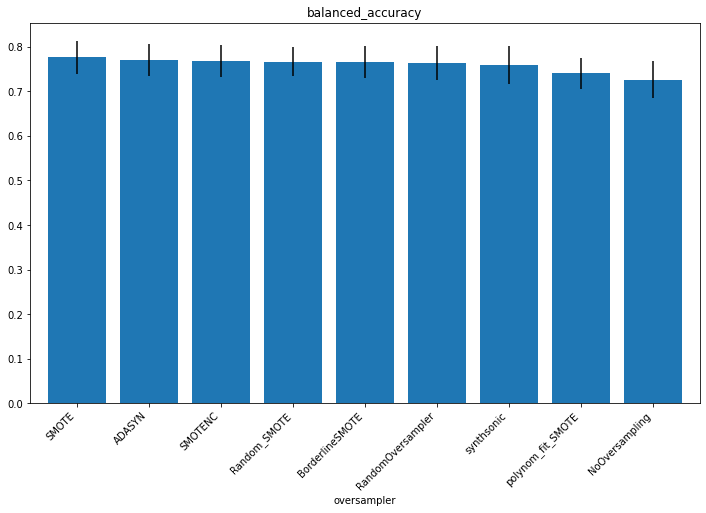

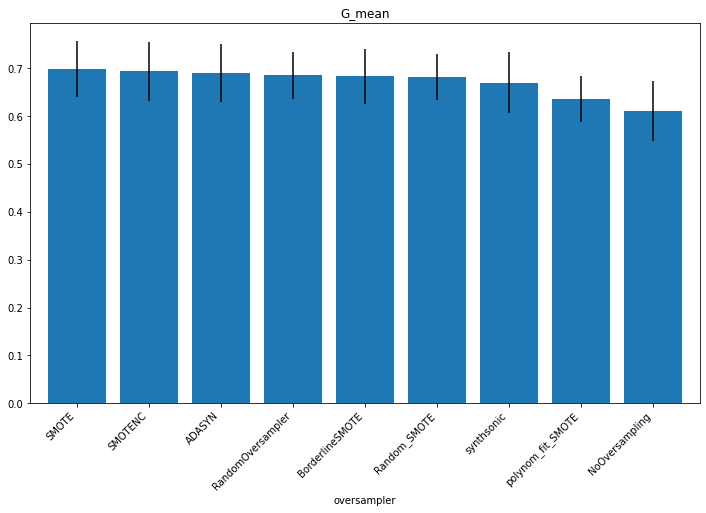

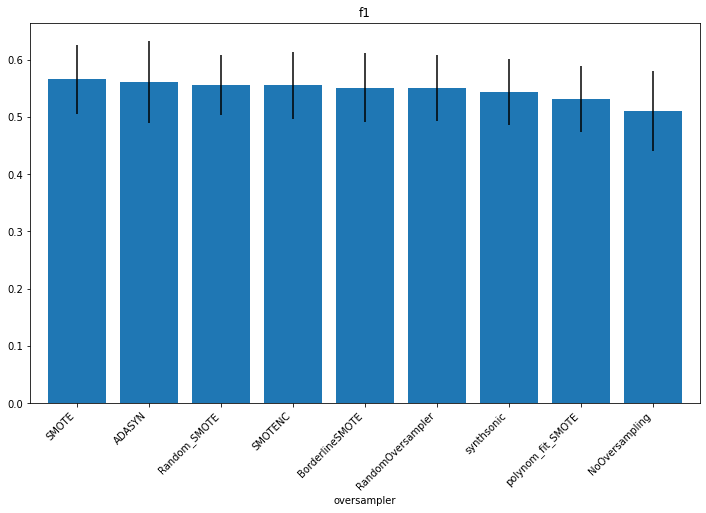

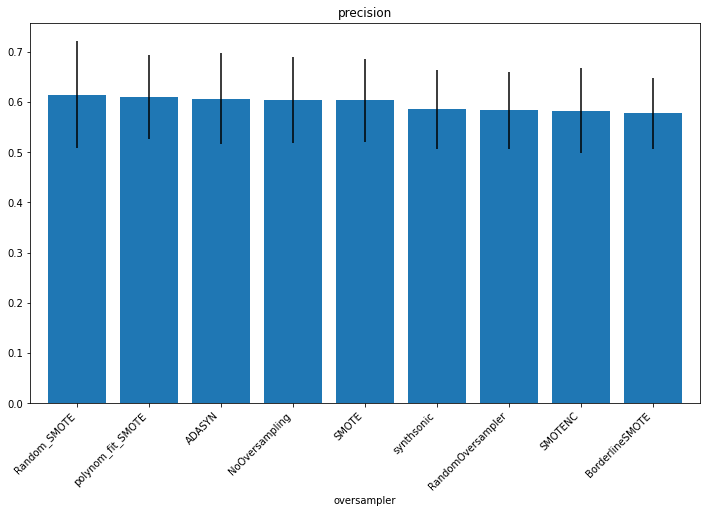

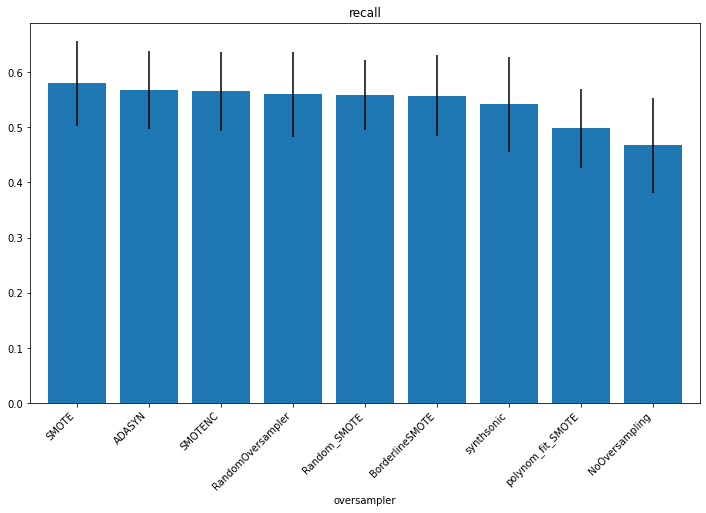

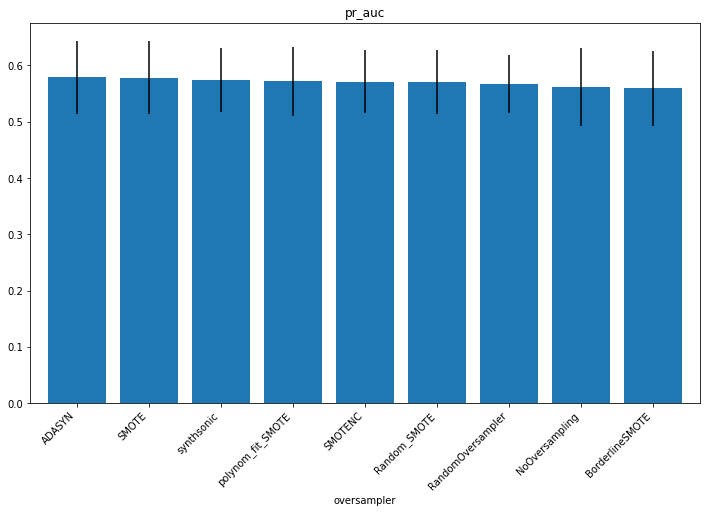

In [50]:
for metric in metrics :
    dft = final_ranking(dfm, metric)
    
    fig, ax = plt.subplots(figsize=(12,7))
    ax.set_title(metric)

    mean = dft[metric]
    std = dft[f'{metric}_std']

    mean.plot(kind='bar', yerr=std, width=0.8)
    
    plt.xticks(rotation=45, ha='right')
    plt.savefig(f'Mixed_{metric}.png', bbox_inches='tight')

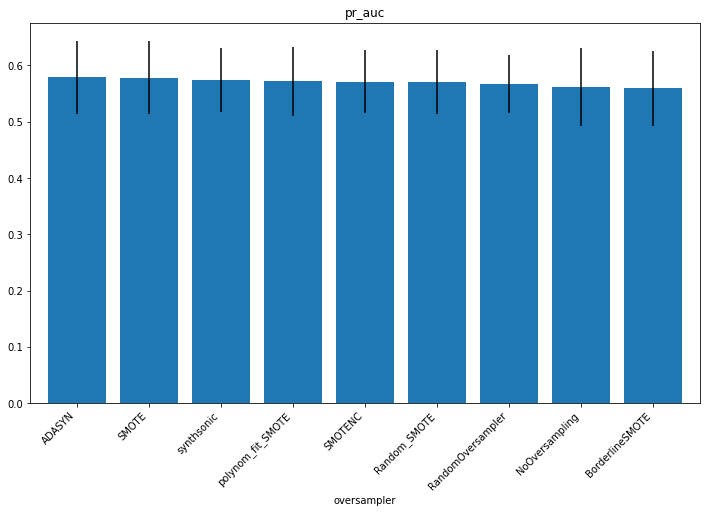